In [2]:
from nba_api.stats.endpoints import leaguedashteamstats

import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score       # use metrics to see how many clusters we should use (approximation)
from sklearn.metrics import calinski_harabasz_score    # name changed

from nba_api.stats.static import players

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\richd\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# NBA API

In [115]:
from nba_api.stats.endpoints import leaguedashteamstats

print(leaguedashlineups.LeagueDashLineups(measure_type_detailed_defense="Four Factors").get_data_frames()[0].head())

  GROUP_SET                                  GROUP_ID  \
0   Lineups     -201145-203115-203932-203999-1628420-   
1   Lineups   -101108-203109-1626164-1628969-1629028-   
2   Lineups    -201144-202711-203497-1626220-1628378-   
3   Lineups   -201143-203935-1627759-1628369-1629057-   
4   Lineups  -201976-1626156-1626157-1629020-1630162-   

                                          GROUP_NAME     TEAM_ID  \
0  J. Green - W. Barton - A. Gordon - N. Jokic - ...  1610612743   
1  C. Paul - J. Crowder - D. Booker - M. Bridges ...  1610612756   
2  M. Conley - B. Bogdanovic - R. Gobert - R. O'N...  1610612762   
3  A. Horford - M. Smart - J. Brown - J. Tatum - ...  1610612738   
4  P. Beverley - D. Russell - K. Towns - J. Vande...  1610612750   

  TEAM_ABBREVIATION  GP   W   L  W_PCT    MIN  ...  W_PCT_RANK  MIN_RANK  \
0               DEN  41  26  15  0.634  761.0  ...        6906         1   
1               PHX  38  31   7  0.816  754.0  ...        5852         2   
2               UTA 

In [112]:
from nba_api.stats.endpoints import leaguedashlineups

# players
# nba api https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/examples.md

#print(leaguedashlineups.LeagueDashLineups(Season='2022'))


# players_factors = leaguedashlineups.Lineups(
#     seasonType = "Regular Season", MeasureType="Four Factors").get_data_frames()[0]

lineups = pd.DataFrame()
for i in range(1):
    # Building the Season String (ie. 2020-21)
    season_str = f"{2021 + i}-{2 + i:02d}"
    # Let's make some attempts to obtain the data, since we might be doing too many requests...
    for attempt in range(5):
        try:
            season_factors = leaguedashteamstats.LeagueDashTeamStats(
                season=season_str, MeasureType="Four Factors",
            ).get_data_frames()[0]
#            season_factors["season"] = 2002 + i
            # Try to get the information for the season, getting only the columns we need
            lineups = pd.concat(
                [lineups, season_factors],
                axis=0,
            )
        except:
            # If we get an error we go to sleep for some time
            time.sleep(30)
        else:
            # If everything's OK with the request, we continue
            break
print(lineups.head())

Empty DataFrame
Columns: []
Index: []


In [137]:
bron = [player for player in player_dict if player['full_name'] == 'Shai Gilgeous-Alexander'][0]
print(bron)

{'id': 1628983, 'full_name': 'Shai Gilgeous-Alexander', 'first_name': 'Shai', 'last_name': 'Gilgeous-Alexander', 'is_active': True}


In [6]:
from nba_api.stats.static import teams
team_dict = teams.get_teams()
OKC = [team for team in team_dict if team['full_name'] == 'Oklahoma City Thunder']
print(OKC)

[{'id': 1610612760, 'full_name': 'Oklahoma City Thunder', 'abbreviation': 'OKC', 'nickname': 'Thunder', 'city': 'Oklahoma City', 'state': 'Oklahoma', 'year_founded': 1967}]


In [9]:
from nba_api.stats.endpoints import playergamelog

gamelog_bron = playergamelog.PlayerGameLog(player_id = '2544', season = '2017')
gamelog_bron_df = gamelog_bron.get_data_frames()[0]
print(gamelog_bron_df.head())

  SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0     22017       2544  0021701220  APR 11, 2018  CLE vs. NYK  L   11    4   
1     22017       2544  0021701207  APR 09, 2018    CLE @ NYK  W   39    7   
2     22017       2544  0021701183  APR 06, 2018    CLE @ PHI  L   40   17   
3     22017       2544  0021701176  APR 05, 2018  CLE vs. WAS  W   39   12   
4     22017       2544  0021701156  APR 03, 2018  CLE vs. TOR  W   37    8   

   FGA  FG_PCT  ...  DREB  REB  AST  STL  BLK  TOV  PF  PTS  PLUS_MINUS  \
0    9   0.444  ...     4    5    2    1    0    3   0   10           5   
1   16   0.438  ...     6    6   11    1    0    4   2   26          16   
2   29   0.586  ...    10   11   11    2    1    8   0   44           7   
3   20   0.600  ...     7    9   14    0    0    6   2   33          13   
4   14   0.571  ...    10   10    6    0    0    5   2   27          12   

   VIDEO_AVAILABLE  
0                1  
1                1  
2                

In [42]:
from nba_api.stats.endpoints import leaguedashlineups
OKC_games = leaguedashlineups.LeagueDashLineups(team_id_nullable = 1610612760, season= '2021-22', measure_type_detailed_defense="Four Factors").get_data_frames()

print(OKC_games[0])
# print(OKC_games.head())
# print(OKC_games.columns)

    GROUP_SET                                   GROUP_ID  \
0     Lineups  -1628983-1629647-1629652-1630526-1630581-   
1     Lineups  -1628983-1629652-1630526-1630581-1630598-   
2     Lineups   -202324-1628983-1629647-1629652-1630581-   
3     Lineups  -1628982-1629658-1630249-1630285-1630686-   
4     Lineups  -1628983-1629647-1629676-1630544-1630598-   
..        ...                                        ...   
748   Lineups  -1628983-1629603-1629647-1629660-1630598-   
749   Lineups  -1628983-1630177-1630197-1630249-1630322-   
750   Lineups  -1629660-1629676-1630177-1630581-1630598-   
751   Lineups  -1629660-1630177-1630526-1630544-1630598-   
752   Lineups  -1630177-1630197-1630322-1630544-1630581-   

                                            GROUP_NAME     TEAM_ID  \
0    S. Gilgeous-Alexander - D. Bazley - L. Dort - ...  1610612760   
1    S. Gilgeous-Alexander - L. Dort - J. Robinson-...  1610612760   
2    D. Favors - S. Gilgeous-Alexander - D. Bazley ...  1610612760   

In [37]:
# 2nd of 4 lineup

from nba_api.stats.endpoints import leaguelineupviz
l_l_viz = leaguelineupviz.LeagueLineupViz(team_id_nullable = 1610612760, season= '2021-22', measure_type_detailed_defense="Four Factors",
                                         minutes_min = '10').get_data_frames()[0]
print(l_l_viz.head())
print(l_l_viz.columns)
print(l_l_viz.shape)

                                   GROUP_ID  \
0     -201145-203115-203932-203999-1628420-   
1   -101108-203109-1626164-1628969-1629028-   
2    -201144-202711-203497-1626220-1628378-   
3   -201143-203935-1627759-1628369-1629057-   
4  -201976-1626156-1626157-1629020-1630162-   

                                          GROUP_NAME     TEAM_ID  \
0  J. Green - W. Barton - A. Gordon - N. Jokic - ...  1610612743   
1  C. Paul - J. Crowder - D. Booker - M. Bridges ...  1610612756   
2  M. Conley - B. Bogdanovic - R. Gobert - R. O'N...  1610612762   
3  A. Horford - M. Smart - J. Brown - J. Tatum - ...  1610612738   
4  P. Beverley - D. Russell - K. Towns - J. Vande...  1610612750   

  TEAM_ABBREVIATION    MIN  OFF_RATING  DEF_RATING  NET_RATING    PACE  \
0               DEN  761.2       121.3       111.8         9.5  100.36   
1               PHX  754.1       116.4       109.0         7.4  100.22   
2               UTA  666.0       117.1       110.5         6.7  100.54   
3           

In [39]:
# 3rd 
#
from nba_api.stats.endpoints import teamdashlineups
l_l_viz = teamdashlineups.TeamDashLineups( season= '2021-22', measure_type_detailed_defense="Four Factors", team_id = 1610612760 ).get_data_frames()[0]
print(l_l_viz.head())
print(l_l_viz.columns)
print(l_l_viz.shape)

  GROUP_SET GROUP_VALUE     TEAM_ID TEAM_ABBREVIATION              TEAM_NAME  \
0   Overall     2021-22  1610612760               OKC  Oklahoma City Thunder   

   GP   W   L  W_PCT     MIN  ...  W_PCT_RANK  MIN_RANK  EFG_PCT_RANK  \
0  82  24  58  0.293  3961.0  ...           1         1             1   

   FTA_RATE_RANK  TM_TOV_PCT_RANK  OREB_PCT_RANK  OPP_EFG_PCT_RANK  \
0              1                1              1                 1   

   OPP_FTA_RATE_RANK  OPP_TOV_PCT_RANK  OPP_OREB_PCT_RANK  
0                  1                 1                  1  

[1 rows x 31 columns]
Index(['GROUP_SET', 'GROUP_VALUE', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
       'GP', 'W', 'L', 'W_PCT', 'MIN', 'EFG_PCT', 'FTA_RATE', 'TM_TOV_PCT',
       'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE', 'OPP_TOV_PCT',
       'OPP_OREB_PCT', 'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'EFG_PCT_RANK', 'FTA_RATE_RANK', 'TM_TOV_PCT_RANK', 'OREB_PCT_RANK',
       'OPP_EFG_PCT_RANK', 'OPP

In [13]:
all_lineups[0].to_csv("all_lineups.csv")

In [11]:
from nba_api.stats.endpoints import leaguedashlineups
all_lineups = leaguedashlineups.LeagueDashLineups(season= '2021-22', measure_type_detailed_defense="Four Factors").get_data_frames()

print(all_lineups[0])
# print(OKC_games.head())
# print(OKC_games.columns)

     GROUP_SET                                   GROUP_ID  \
0      Lineups      -201145-203115-203932-203999-1628420-   
1      Lineups    -101108-203109-1626164-1628969-1629028-   
2      Lineups     -201144-202711-203497-1626220-1628378-   
3      Lineups    -201143-203935-1627759-1628369-1629057-   
4      Lineups   -201976-1626156-1626157-1629020-1630162-   
...        ...                                        ...   
1995   Lineups     -203107-203484-204001-1630264-1630557-   
1996   Lineups   -202684-1627741-1629052-1630169-1630537-   
1997   Lineups   -202684-1628972-1629750-1630172-1630245-   
1998   Lineups  -1628976-1629678-1630175-1630532-1630591-   
1999   Lineups  -1626195-1627742-1629638-1630184-1630530-   

                                             GROUP_NAME     TEAM_ID  \
0     J. Green - W. Barton - A. Gordon - N. Jokic - ...  1610612743   
1     C. Paul - J. Crowder - D. Booker - M. Bridges ...  1610612756   
2     M. Conley - B. Bogdanovic - R. Gobert - R. O'N..

In [33]:
print(type(OKC_games))
OKC_games.to_csv('OKC.csv')

<class 'pandas.core.frame.DataFrame'>


In [43]:
from nba_api.stats.endpoints import leaguedashlineups
result = leaguedashlineups.LeagueDashLineups()
all_games = result.get_data_frames()[0]
print(all_games.head())

  GROUP_SET                                  GROUP_ID  \
0   Lineups     -201145-203115-203932-203999-1628420-   
1   Lineups   -101108-203109-1626164-1628969-1629028-   
2   Lineups    -201144-202711-203497-1626220-1628378-   
3   Lineups   -201143-203935-1627759-1628369-1629057-   
4   Lineups  -201976-1626156-1626157-1629020-1630162-   

                                          GROUP_NAME     TEAM_ID  \
0  J. Green - W. Barton - A. Gordon - N. Jokic - ...  1610612743   
1  C. Paul - J. Crowder - D. Booker - M. Bridges ...  1610612756   
2  M. Conley - B. Bogdanovic - R. Gobert - R. O'N...  1610612762   
3  A. Horford - M. Smart - J. Brown - J. Tatum - ...  1610612738   
4  P. Beverley - D. Russell - K. Towns - J. Vande...  1610612750   

  TEAM_ABBREVIATION  GP   W   L  W_PCT         MIN  ...  REB_RANK  AST_RANK  \
0               DEN  41  26  15  0.634  761.211667  ...         1         1   
1               PHX  38  31   7  0.816  754.110000  ...         2         2   
2          

In [46]:
all_games['grou_name_len'] = all_games['GROUP_ID'].str.len()
print(all_games.head())

  GROUP_SET                                  GROUP_ID  \
0   Lineups     -201145-203115-203932-203999-1628420-   
1   Lineups   -101108-203109-1626164-1628969-1629028-   
2   Lineups    -201144-202711-203497-1626220-1628378-   
3   Lineups   -201143-203935-1627759-1628369-1629057-   
4   Lineups  -201976-1626156-1626157-1629020-1630162-   

                                          GROUP_NAME     TEAM_ID  \
0  J. Green - W. Barton - A. Gordon - N. Jokic - ...  1610612743   
1  C. Paul - J. Crowder - D. Booker - M. Bridges ...  1610612756   
2  M. Conley - B. Bogdanovic - R. Gobert - R. O'N...  1610612762   
3  A. Horford - M. Smart - J. Brown - J. Tatum - ...  1610612738   
4  P. Beverley - D. Russell - K. Towns - J. Vande...  1610612750   

  TEAM_ABBREVIATION  GP   W   L  W_PCT         MIN  ...  AST_RANK  TOV_RANK  \
0               DEN  41  26  15  0.634  761.211667  ...         1     17383   
1               PHX  38  31   7  0.816  754.110000  ...         2     17381   
2          

In [52]:
print(all_games['grou_name_len'].min())
print(all_games[all_games['grou_name_len'] == all_games['grou_name_len'].min()])

30
    GROUP_SET                        GROUP_ID  \
348   Lineups  -2544-2730-2772-201566-202340-   

                                            GROUP_NAME     TEAM_ID  \
348  L. James - D. Howard - T. Ariza - R. Westbrook...  1610612747   

    TEAM_ABBREVIATION  GP  W  L  W_PCT        MIN  ...  AST_RANK  TOV_RANK  \
348               LAL   4  2  2    0.5  43.333333  ...       695     17080   

     STL_RANK  BLK_RANK  BLKA_RANK  PF_RANK  PFD_RANK  PTS_RANK  \
348       457       430      17225    16898       448       469   

     PLUS_MINUS_RANK  grou_name_len  
348            17068             30  

[1 rows x 58 columns]


In [58]:
import pandas as pd
from nba_api.stats.static import players
player_dict = players.get_players()

shai = [player for player in player_dict if player['full_name'] == 'Shai Gilgeous-Alexander'][0]
print(shai)

{'id': 1628983, 'full_name': 'Shai Gilgeous-Alexander', 'first_name': 'Shai', 'last_name': 'Gilgeous-Alexander', 'is_active': True}


In [88]:
from nba_api.stats.endpoints import playerdashptshots
result = playerdashptshots.PlayerDashPtShots(player_id = 1628983, team_id = 1610612760).get_data_frames()[6]
print(result.head())
print(result.columns)

   PLAYER_ID    PLAYER_NAME_LAST_FIRST  SORT_ORDER  GP   G   TOUCH_TIME_RANGE  \
0    1628983  Gilgeous-Alexander, Shai           1  56  44  Touch < 2 Seconds   
1    1628983  Gilgeous-Alexander, Shai           2  56  56  Touch 2-6 Seconds   
2    1628983  Gilgeous-Alexander, Shai           3  56  56   Touch 6+ Seconds   

   FGA_FREQUENCY  FGM  FGA  FG_PCT  EFG_PCT  FG2A_FREQUENCY  FG2M  FG2A  \
0          0.097   51  102   0.500    0.618           0.035    27    37   
1          0.411  198  432   0.458    0.493           0.307   168   322   
2          0.491  227  516   0.440    0.474           0.375   192   394   

   FG2_PCT  FG3A_FREQUENCY  FG3M  FG3A  FG3_PCT  
0    0.730           0.062    24    65    0.369  
1    0.522           0.105    30   110    0.273  
2    0.487           0.116    35   122    0.287  
Index(['PLAYER_ID', 'PLAYER_NAME_LAST_FIRST', 'SORT_ORDER', 'GP', 'G',
       'TOUCH_TIME_RANGE', 'FGA_FREQUENCY', 'FGM', 'FGA', 'FG_PCT', 'EFG_PCT',
       'FG2A_FREQUENCY',

In [79]:
# averages all say 100%  [1]

# goldsberry shot charts here https://savvastjortjoglou.com/nba-shot-sharts.html

from nba_api.stats.endpoints import shotchartdetail
r = shotchartdetail.ShotChartDetail(player_id = 1628983, team_id = 1610612760).get_data_frames()[0]
print(r.head(5))
print(r.columns)

           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID  \
0  Shot Chart Detail  0021900011             90    1628983   
1  Shot Chart Detail  0021900011            243    1628983   
2  Shot Chart Detail  0021900011            314    1628983   
3  Shot Chart Detail  0021900011            320    1628983   
4  Shot Chart Detail  0021900011            324    1628983   

               PLAYER_NAME     TEAM_ID              TEAM_NAME  PERIOD  \
0  Shai Gilgeous-Alexander  1610612760  Oklahoma City Thunder       1   
1  Shai Gilgeous-Alexander  1610612760  Oklahoma City Thunder       2   
2  Shai Gilgeous-Alexander  1610612760  Oklahoma City Thunder       2   
3  Shai Gilgeous-Alexander  1610612760  Oklahoma City Thunder       2   
4  Shai Gilgeous-Alexander  1610612760  Oklahoma City Thunder       2   

   MINUTES_REMAINING  SECONDS_REMAINING  ...        SHOT_ZONE_AREA  \
0                  5                 40  ...             Center(C)   
1                  7                 20  ...    

In [81]:
print(r[['EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC']].head())

  EVENT_TYPE                 ACTION_TYPE       SHOT_TYPE  \
0  Made Shot          Driving Layup Shot  2PT Field Goal   
1  Made Shot                   Jump Shot  3PT Field Goal   
2  Made Shot          Driving Layup Shot  2PT Field Goal   
3  Made Shot  Driving Reverse Layup Shot  2PT Field Goal   
4  Made Shot                   Jump Shot  3PT Field Goal   

         SHOT_ZONE_BASIC  
0  In The Paint (Non-RA)  
1         Right Corner 3  
2  In The Paint (Non-RA)  
3        Restricted Area  
4      Above the Break 3  


In [96]:
from nba_api.stats.endpoints import shotchartlineupdetail
t = shotchartlineupdetail.ShotChartLineupDetail(group_id = '-1628983-1629647-1629652-1630526-1630581-',
                                               context_measure_detailed = 'STL').get_data_frames()[0]
print(t.head(5))
print(t.columns)

           GRID_TYPE     GAME_ID  GAME_EVENT_ID  \
0  Shot Chart Detail  0022100038            606   
1  Shot Chart Detail  0022100051             43   
2  Shot Chart Detail  0022100051            316   
3  Shot Chart Detail  0022100051            348   
4  Shot Chart Detail  0022100086             13   

                                    GROUP_ID  \
0  -1628983-1629647-1629652-1630526-1630581-   
1  -1628983-1629647-1629652-1630526-1630581-   
2  -1628983-1629647-1629652-1630526-1630581-   
3  -1628983-1629647-1629652-1630526-1630581-   
4  -1628983-1629647-1629652-1630526-1630581-   

                                          GROUP_NAME  PLAYER_ID  \
0  S. Gilgeous-Alexander - D. Bazley - L. Dort - ...    1630581   
1  S. Gilgeous-Alexander - D. Bazley - L. Dort - ...    1628983   
2  S. Gilgeous-Alexander - D. Bazley - L. Dort - ...    1630581   
3  S. Gilgeous-Alexander - D. Bazley - L. Dort - ...    1629647   
4  S. Gilgeous-Alexander - D. Bazley - L. Dort - ...    1630581   

 

In [99]:
from nba_api.stats.endpoints import leaguedashoppptshot
l = leaguedashoppptshot.LeagueDashOppPtShot(team_id_nullable = 1610612760).get_data_frames()[0]
print(l.head(5))
print(l.columns)

# https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/leaguedashoppptshot.md NULLABLE PARAMETERS closedefdist


      TEAM_ID              TEAM_NAME TEAM_ABBREVIATION  GP   G  FGA_FREQUENCY  \
0  1610612760  Oklahoma City Thunder               OKC  82  82            1.0   

    FGM   FGA  FG_PCT  EFG_PCT  FG2A_FREQUENCY  FG2M  FG2A  FG2_PCT  \
0  3396  7418   0.458    0.533           0.573  2278  4249    0.536   

   FG3A_FREQUENCY  FG3M  FG3A  FG3_PCT  
0           0.427  1118  3169    0.353  
Index(['TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'GP', 'G', 'FGA_FREQUENCY',
       'FGM', 'FGA', 'FG_PCT', 'EFG_PCT', 'FG2A_FREQUENCY', 'FG2M', 'FG2A',
       'FG2_PCT', 'FG3A_FREQUENCY', 'FG3M', 'FG3A', 'FG3_PCT'],
      dtype='object')


In [129]:
from nba_api.stats.endpoints import teamdashptshots
l = teamdashptshots.TeamDashPtShots(opponent_team_id = 1610612760, team_id = (1610612737 | 1610612738 | 1610612739 | 1610612740 | 1610612741 | 1610612742 | 1610612743 | 1610612744 | 1610612745 | 1610612746)).get_data_frames()[0]
print(l.head(5))
print(l.columns)
print(l.shape)

      TEAM_ID      TEAM_NAME  SORT_ORDER  G        SHOT_TYPE  FGA_FREQUENCY  \
0  1610612751  Brooklyn Nets           1  2           Totals          1.000   
1  1610612751  Brooklyn Nets           2  2  Catch and Shoot          0.267   
2  1610612751  Brooklyn Nets           3  2          Pullups          0.339   
3  1610612751  Brooklyn Nets           4  2  Less than 10 ft          0.383   

   FGM  FGA  FG_PCT  EFG_PCT  FG2A_FREQUENCY  FG2M  FG2A  FG2_PCT  \
0   82  180   0.456    0.525           0.583    57   105    0.543   
1   19   48   0.396    0.563           0.028     3     5    0.600   
2   25   61   0.410    0.484           0.167    16    30    0.533   
3   37   69   0.536    0.536           0.383    37    69    0.536   

   FG3A_FREQUENCY  FG3M  FG3A  FG3_PCT  
0           0.417    25    75    0.333  
1           0.239    16    43    0.372  
2           0.172     9    31    0.290  
3           0.000     0     0      NaN  
Index(['TEAM_ID', 'TEAM_NAME', 'SORT_ORDER', 'G', 'SH

In [113]:
num_list = [0,1,2,3,4,5]
print(num_list)

[0, 1, 2, 3, 4, 5]


In [9]:
import pandas as pd
from nba_api.stats.static import teams
team_dict = teams.get_teams()
#print(pd.DataFrame(team_dict))

id_team_name = pd.DataFrame(team_dict)[['id', 'full_name']]
#print(id_team_name)

num_list = [0,1,2,3,4,5]

team_shot_df = []


for i in id_team_name['id']:
    for j in num_list:
        df = teamdashptshots.TeamDashPtShots(team_id = i, season='2021-22').get_data_frames()[j]
        df['dataset'] = j
        team_shot_df.append(df)

# for i in id_team_name['id']:
#     for j in num_list:
#         print(i)
#         print(j)
print(team_shot_df)


[]
            id               full_name
0   1610612737           Atlanta Hawks
1   1610612738          Boston Celtics
2   1610612739     Cleveland Cavaliers
3   1610612740    New Orleans Pelicans
4   1610612741           Chicago Bulls
5   1610612742        Dallas Mavericks
6   1610612743          Denver Nuggets
7   1610612744   Golden State Warriors
8   1610612745         Houston Rockets
9   1610612746    Los Angeles Clippers
10  1610612747      Los Angeles Lakers
11  1610612748              Miami Heat
12  1610612749         Milwaukee Bucks
13  1610612750  Minnesota Timberwolves
14  1610612751           Brooklyn Nets
15  1610612752         New York Knicks
16  1610612753           Orlando Magic
17  1610612754          Indiana Pacers
18  1610612755      Philadelphia 76ers
19  1610612756            Phoenix Suns
20  1610612757  Portland Trail Blazers
21  1610612758        Sacramento Kings
22  1610612759       San Antonio Spurs
23  1610612760   Oklahoma City Thunder
24  1610612761        

In [131]:
tm_shot_df = pd.concat(team_shot_df, axis=0)
print(tm_shot_df.head())

      TEAM_ID      TEAM_NAME  SORT_ORDER   G        SHOT_TYPE  FGA_FREQUENCY  \
0  1610612737  Atlanta Hawks           1  82           Totals          1.000   
1  1610612737  Atlanta Hawks           2  82  Catch and Shoot          0.267   
2  1610612737  Atlanta Hawks           3  82          Pullups          0.319   
3  1610612737  Atlanta Hawks           4  82  Less than 10 ft          0.399   
0  1610612737  Atlanta Hawks           1  82              NaN          0.033   

    FGM   FGA  FG_PCT  EFG_PCT  ...  FG2_PCT  FG3A_FREQUENCY  FG3M  FG3A  \
0  3401  7239   0.470    0.543  ...    0.531           0.390  1056  2822   
1   768  1932   0.398    0.575  ...    0.454           0.241   684  1747   
2   922  2307   0.400    0.476  ...    0.440           0.140   354  1015   
3  1665  2885   0.577    0.577  ...    0.577           0.000     0     0   
0   120   236   0.508    0.521  ...    0.514           0.002     6    14   

   FG3_PCT  dataset  SHOT_CLOCK_RANGE  DRIBBLE_RANGE  CLOSE_DE

In [195]:
tm_shot_df.to_csv('tm_shot_df.csv')

In [120]:
print(id_team_name['id'])

0     1610612737
1     1610612738
2     1610612739
3     1610612740
4     1610612741
5     1610612742
6     1610612743
7     1610612744
8     1610612745
9     1610612746
10    1610612747
11    1610612748
12    1610612749
13    1610612750
14    1610612751
15    1610612752
16    1610612753
17    1610612754
18    1610612755
19    1610612756
20    1610612757
21    1610612758
22    1610612759
23    1610612760
24    1610612761
25    1610612762
26    1610612763
27    1610612764
28    1610612765
29    1610612766
Name: id, dtype: int64


In [185]:
a = pd.read_csv("C:\\Users\\richd\\456 Sports Analytics Quarter\\okc_group_id.csv")
print(a.head())

                                    GROUP_ID
0  -1628983-1629647-1629652-1630526-1630581-
1  -1628983-1629652-1630526-1630581-1630598-
2   -202324-1628983-1629647-1629652-1630581-
3  -1628982-1629658-1630249-1630285-1630686-
4  -1628983-1629647-1629676-1630544-1630598-


In [206]:
from nba_api.stats.endpoints import leaguedashplayershotlocations
l = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(team_id_nullable = 1610612760 ).get_data_frames()[0]   # , player_id = '1628983'
print(l.head(20))
print(l.describe())

SHOT_CATEGORY                                                                  \
columns       PLAYER_ID             PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   
0               1630598           Aaron Wiggins  1610612760               OKC   
1               1630197     Alekesej Pokusevski  1610612760               OKC   
2               1629647           Darius Bazley  1610612760               OKC   
3                202324          Derrick Favors  1610612760               OKC   
4               1630466            Gabriel Deck  1610612760               OKC   
5               1630686    Georgios Kalaitzakis  1610612760               OKC   
6               1629676             Isaiah Roby  1610612760               OKC   
7               1629658            Jaylen Hoard  1610612760               OKC   
8               1630526  Jeremiah Robinson-Earl  1610612760               OKC   
9               1630581             Josh Giddey  1610612760               OKC   
10              1629026     

In [204]:
# print(l['SHOT_ATTEMPTED_FLAG'].sum())
# print(l['SHOT_MADE_FLAG'].sum())
print(l.columns)

MultiIndex([(                     '',         'PLAYER_ID'),
            (                     '',       'PLAYER_NAME'),
            (                     '',           'TEAM_ID'),
            (                     '', 'TEAM_ABBREVIATION'),
            (                     '',               'AGE'),
            (                     '',          'NICKNAME'),
            (      'Restricted Area',               'FGM'),
            (      'Restricted Area',               'FGA'),
            (      'Restricted Area',            'FG_PCT'),
            ('In The Paint (Non-RA)',               'FGM'),
            ('In The Paint (Non-RA)',               'FGA'),
            ('In The Paint (Non-RA)',            'FG_PCT'),
            (            'Mid-Range',               'FGM'),
            (            'Mid-Range',               'FGA'),
            (            'Mid-Range',            'FG_PCT'),
            (        'Left Corner 3',               'FGM'),
            (        'Left Corner 3',   

In [6]:
from nba_api.stats.endpoints import leaguelineupviz
s = leaguelineupviz.LeagueLineupViz(team_id_nullable = 1610612760, measure_type_detailed_defense = 'Four Factors', minutes_min = 20 ).get_data_frames()[0]   # , player_id = '1628983'
s = s[s['TEAM_ABBREVIATION'] == 'OKC' ]


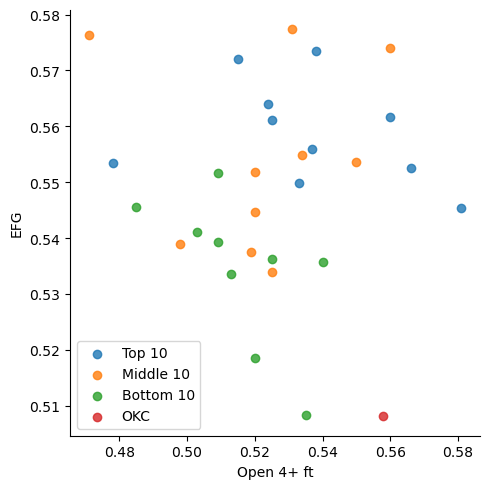

In [3]:
df = pd.read_csv("C:\\Users\\richd\\456 Sports Analytics Quarter\\shooting.csv")
 
# Use the 'hue' argument to provide a factor variable

hue_order = ['Top 10', 'Middle 10', 'Bottom 10', 'OKC']
sns.lmplot(x="Open 4+ ft", y="EFG", data=df, fit_reg=False, hue='Tier', legend=False, hue_order=hue_order)

# Move the legend to an empty part of the plot
plt.legend(loc='lower left')

plt.show()


In [7]:
from nba_api.stats.static import teams
team_dict = teams.get_teams()
id_teams = pd.DataFrame(team_dict)
#print(pd.DataFrame(team_dict))

from nba_api.stats.static import players
player_dict = players.get_players()
id_players = pd.DataFrame(player_dict)
id_players = id_players[id_players['is_active'] == True]

print(id_players.head())
print()

         id          full_name first_name last_name  is_active
10  1630173   Precious Achiuwa   Precious   Achiuwa       True
22   203500       Steven Adams     Steven     Adams       True
24  1628389        Bam Adebayo        Bam   Adebayo       True
40  1630583       Santi Aldama      Santi    Aldama       True
43   200746  LaMarcus Aldridge   LaMarcus  Aldridge       True



In [8]:
from nba_api.stats.endpoints import   commonteamroster

player_team_id = []
for i in id_teams['id']:
    team_df = commonteamroster.CommonTeamRoster(team_id = i).get_data_frames()[0]
    player_team_id.append(team_df)
    
player_team_id = pd.concat(player_team_id, axis=0)
print(player_team_id.head())

       TeamID SEASON LeagueID            PLAYER NICKNAME       PLAYER_SLUG  \
0  1610612737   2022       00  Donovan Williams  Donovan  donovan-williams   
1  1610612737   2022       00    Frank Kaminsky    Frank    frank-kaminsky   
2  1610612737   2022       00     Jalen Johnson    Jalen     jalen-johnson   
3  1610612737   2022       00     Trent Forrest    Trent     trent-forrest   
4  1610612737   2022       00     Aaron Holiday    Aaron     aaron-holiday   

    NUM POSITION HEIGHT WEIGHT    BIRTH_DATE   AGE EXP         SCHOOL  \
0  None        G    6-6    190  SEP 06, 2001  21.0   R           UNLV   
1     0      F-C    7-0    240  APR 04, 1993  29.0   7      Wisconsin   
2     1        F    6-8    219  DEC 18, 2001  21.0   1           Duke   
3     2        G    6-4    210  JUN 12, 1998  24.0   2  Florida State   
4     3        G    6-0    185  SEP 30, 1996  26.0   4           UCLA   

   PLAYER_ID            HOW_ACQUIRED  
0    1631495      Signed on 01/17/23  
1    1626163  

In [9]:
# for i in id_teams['id']:
#     for j in id_players['id']:
#         for k in num_list:
#             print(i,j,k)

from nba_api.stats.endpoints import playerdashptshots

print(playerdashptshots.PlayerDashPtShots(team_id = 1610612737 , player_id = 1628386 ).get_data_frames()[0].head())

Empty DataFrame
Columns: [PLAYER_ID, PLAYER_NAME_LAST_FIRST, SORT_ORDER, GP, G, SHOT_TYPE, FGA_FREQUENCY, FGM, FGA, FG_PCT, EFG_PCT, FG2A_FREQUENCY, FG2M, FG2A, FG2_PCT, FG3A_FREQUENCY, FG3M, FG3A, FG3_PCT]
Index: []


In [11]:
ah = player_team_id[player_team_id['TeamID'] == 1610612737]
print(ah.head())

       TeamID SEASON LeagueID            PLAYER NICKNAME       PLAYER_SLUG  \
0  1610612737   2022       00  Donovan Williams  Donovan  donovan-williams   
1  1610612737   2022       00    Frank Kaminsky    Frank    frank-kaminsky   
2  1610612737   2022       00     Jalen Johnson    Jalen     jalen-johnson   
3  1610612737   2022       00     Trent Forrest    Trent     trent-forrest   
4  1610612737   2022       00     Aaron Holiday    Aaron     aaron-holiday   

    NUM POSITION HEIGHT WEIGHT    BIRTH_DATE   AGE EXP         SCHOOL  \
0  None        G    6-6    190  SEP 06, 2001  21.0   R           UNLV   
1     0      F-C    7-0    240  APR 04, 1993  29.0   7      Wisconsin   
2     1        F    6-8    219  DEC 18, 2001  21.0   1           Duke   
3     2        G    6-4    210  JUN 12, 1998  24.0   2  Florida State   
4     3        G    6-0    185  SEP 30, 1996  26.0   4           UCLA   

   PLAYER_ID            HOW_ACQUIRED  
0    1631495      Signed on 01/17/23  
1    1626163  

In [13]:
from nba_api.stats.endpoints import draftcombineplayeranthro
import pandas as pd

wing = []

#a = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year = 2019 ).get_data_frames()[0].head()

for i in range(2006,2023):
    a = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year = i ).get_data_frames()[0]
    wing.append(a)

wing = pd.concat(wing, axis=0)
#a.to_csv('wingspan.csv')
print(wing.head())

  TEMP_PLAYER_ID  PLAYER_ID FIRST_NAME LAST_NAME        PLAYER_NAME POSITION  \
0           None      12123      Kenny   Adeleke      Kenny Adeleke     PF-C   
1           None     200772    Maurice      Ager       Maurice Ager    SG-PG   
2           None     200746   LaMarcus  Aldridge  LaMarcus Aldridge     PF-C   
3           None     201165     Morris    Almond      Morris Almond    SG-SF   
4           None     200811        Lou  Amundson       Lou Amundson       PF   

   HEIGHT_WO_SHOES HEIGHT_WO_SHOES_FT_IN  HEIGHT_W_SHOES HEIGHT_W_SHOES_FT_IN  \
0            78.50              6' 6.5''           79.75            6' 7.75''   
1            75.25             6' 3.25''           76.50             6' 4.5''   
2            82.00               6' 10''           83.25           6' 11.25''   
3            76.75             6' 4.75''           78.00               6' 6''   
4            79.20              6' 7.2''           80.00               6' 8''   

  WEIGHT  WINGSPAN WINGSPAN_FT_I

In [4]:
df = pd.read_csv("C:\\Users\\richd\\456 Sports Analytics Quarter\okc\\bubble graph four factors.csv")

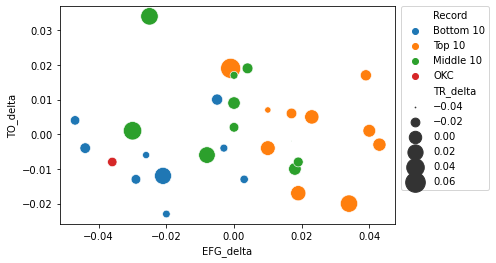

In [44]:
sns.scatterplot(data=df, x="EFG_delta", y="TO_delta", size="TR_delta", hue="Record", sizes=(.5,400))
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)

In [6]:
print(df)

                 TEAM_NAME  EFG_delta  TO_delta  TR_delta
0           Indiana Pacers     -0.021    -0.012     0.035
1        San Antonio Spurs     -0.005     0.010    -0.008
2       Philadelphia 76ers      0.010     0.007    -0.030
3            Chicago Bulls      0.000     0.002    -0.016
4             Phoenix Suns      0.039     0.017    -0.008
5   Portland Trail Blazers     -0.044    -0.004    -0.011
6           Boston Celtics      0.040     0.001     0.002
7                Utah Jazz      0.034    -0.020     0.038
8          New York Knicks     -0.008    -0.006     0.031
9         Dallas Mavericks      0.017     0.006    -0.011
10         Houston Rockets     -0.020    -0.023    -0.025
11         Milwaukee Bucks      0.010    -0.004     0.016
12          Denver Nuggets      0.019    -0.017     0.020
13      Los Angeles Lakers     -0.003    -0.004    -0.024
14           Atlanta Hawks      0.000     0.009     0.000
15        Sacramento Kings     -0.026    -0.006    -0.027
16     Clevela

In [53]:
df_2 = pd.read_csv("C:\\Users\\richd\\456 Sports Analytics Quarter\okc\\bubble graph four factors all.csv")
print(df_2.head())

            TEAM_NAME   W  EFG_delta  TO_delta  TR_delta     FT
0      Indiana Pacers  25     -0.021    -0.012     0.035 -0.017
1   San Antonio Spurs  34     -0.005     0.010    -0.008 -0.009
2  Philadelphia 76ers  51      0.010     0.007    -0.030  0.032
3       Chicago Bulls  46      0.000     0.002    -0.016 -0.003
4        Phoenix Suns  64      0.039     0.017    -0.008 -0.036


In [54]:
print(df_2.columns[1:])

print(df_2[df_2.columns[1:]].head())

print(df_2[['EFG_delta', 'TO_delta']])

Index(['W', 'EFG_delta', 'TO_delta', 'TR_delta', 'FT'], dtype='object')
    W  EFG_delta  TO_delta  TR_delta     FT
0  25     -0.021    -0.012     0.035 -0.017
1  34     -0.005     0.010    -0.008 -0.009
2  51      0.010     0.007    -0.030  0.032
3  46      0.000     0.002    -0.016 -0.003
4  64      0.039     0.017    -0.008 -0.036
    EFG_delta  TO_delta
0      -0.021    -0.012
1      -0.005     0.010
2       0.010     0.007
3       0.000     0.002
4       0.039     0.017
5      -0.044    -0.004
6       0.040     0.001
7       0.034    -0.020
8      -0.008    -0.006
9       0.017     0.006
10     -0.020    -0.023
11      0.010    -0.004
12      0.019    -0.017
13     -0.003    -0.004
14      0.000     0.009
15     -0.026    -0.006
16      0.018    -0.010
17     -0.030     0.001
18      0.043    -0.003
19      0.019    -0.008
20     -0.047     0.004
21      0.023     0.005
22     -0.029    -0.013
23     -0.001     0.019
24      0.017    -0.002
25     -0.036    -0.008
26      0.004   

In [56]:
from sklearn import linear_model

X = df_2[df_2.columns[1:]]
y = df_2['W']

regr = linear_model.LinearRegression()
regr.fit(X,y)

print(regr.coef_)

[ 1.00000000e+00  7.73659404e-15  4.64169233e-15  9.85059458e-15
 -1.98449669e-15]


# K-Means

In [3]:
# this GitHub https://github.com/lbiedma/nba-stats-analysis/blob/main/FourFactorsAnalysis.ipynb  ; took about 5 seconds

four_factors = pd.DataFrame()
for i in range(21):
    # Building the Season String (ie. 2020-21)
    season_str = f"{2001 + i}-{2 + i:02d}"
    # Let's make some attempts to obtain the data, since we might be doing too many requests...
    for attempt in range(5):
        try:
            season_factors = leaguedashteamstats.LeagueDashTeamStats(
                season=season_str, measure_type_detailed_defense="Four Factors",
            ).get_data_frames()[0]
            season_factors["season"] = 2002 + i
            # Try to get the information for the season, getting only the columns we need
            four_factors = pd.concat(
                [four_factors, season_factors],
                axis=0,
            )
        except:
            # If we get an error we go to sleep for some time
            time.sleep(30)
        else:
            # If everything's OK with the request, we continue
            break

In [6]:
cols = ['EFG_PCT_RANK', 'TM_TOV_PCT_RANK', 'OREB_PCT_RANK', 'FTA_RATE_RANK', 'OPP_EFG_PCT_RANK', 'OPP_TOV_PCT_RANK',
       'OPP_OREB_PCT_RANK', 'OPP_TOV_PCT_RANK','W_PCT']

#k_df = four_factors          # take the 8 columns and win pct

print(four_factors[cols].head())

   EFG_PCT_RANK  TM_TOV_PCT_RANK  OREB_PCT_RANK  FTA_RATE_RANK  \
0            18               25             22             13   
1            15                5             29             14   
2            20               10              9              6   
3            26               24             21             11   
4            11               16             15             12   

   OPP_EFG_PCT_RANK  OPP_TOV_PCT_RANK  OPP_OREB_PCT_RANK  OPP_TOV_PCT_RANK  \
0                28                11                  9                11   
1                 6                 2                  5                 2   
2                 7                18                  8                18   
3                29                15                 12                15   
4                27                26                  7                26   

   W_PCT  
0  0.402  
1  0.598  
2  0.537  
3  0.256  
4  0.354  


In [85]:
#df = pd.DataFrame(four_factors['W_PCT'])

four_factors['FG'] = four_factors['EFG_PCT'] - four_factors['OPP_EFG_PCT']
four_factors['TO'] = four_factors['OPP_TOV_PCT'] - four_factors['TM_TOV_PCT']
four_factors['TR'] = four_factors['OREB_PCT'] - four_factors['OPP_OREB_PCT']
four_factors['FT'] = four_factors['FTA_RATE'] - four_factors['OPP_FTA_RATE']

#print(df.head())

In [98]:
TARGET = "W_PCT"

X = four_factors[cols].copy()
X = X.drop( [TARGET], axis=1)

varNames = X.columns

In [99]:
# Transform
theScaler = StandardScaler()      # standardize the data
theScaler.fit( X )
X_TRN = theScaler.transform( X )  # transform data
X_TRN = pd.DataFrame( X_TRN )     # create dataframe from standardized data

# put dataframe names back in 
varNames_trn = []
for i in varNames:
    newName = "trn_" + i
    varNames_trn.append( newName )
    
X_TRN.columns = varNames_trn
print(X_TRN.head())

   trn_EFG_PCT_RANK  trn_TM_TOV_PCT_RANK  trn_OREB_PCT_RANK  \
0          0.298152             1.110436           0.762314   
1         -0.049970            -1.210375           1.574598   
2          0.530233            -0.630173          -0.746213   
3          1.226477             0.994396           0.646274   
4         -0.514132             0.066071          -0.049970   

   trn_FTA_RATE_RANK  trn_OPP_EFG_PCT_RANK  trn_OPP_TOV_PCT_RANK  \
0          -0.282051              1.458558             -0.514080   
1          -0.166010             -1.094335             -1.558716   
2          -1.094335             -0.978294              0.298415   
3          -0.514132              1.574598             -0.049797   
4          -0.398091              1.342517              1.226980   

   trn_OPP_OREB_PCT_RANK  trn_OPP_TOV_PCT_RANK  
0              -0.746213             -0.514080  
1              -1.210375             -1.558716  
2              -0.862254              0.298415  
3              -

In [100]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

# how many clusters to use
for K in range(3,12) :
    km = KMeans( n_clusters = K, random_state = 1)          
    km.fit( X_TRN )
    K_LIST.append( K )                                            # save range into a list
    I_LIST.append( km.inertia_ )                                  # grab some scores ; inertia comes automatically
    S_LIST.append( silhouette_score(X_TRN, km.labels_ ) )         # another score
    C_LIST.append( calinski_harabasz_score(X_TRN, km.labels_ ) )  # another score
    
# plot
def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K, SCORE, 'ro-', linewidth=2)
    plt.title( LABEL )
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()
    
#drawElbow( K_LIST, I_LIST, "Inertia" )        # K_List of each cluster #, I_list is score
# # inertia will always go down, looking for the elbow where it starts to flatten off
# # theory on this would be go 5, he would look at 3-5, looking for a range

# drawElbow( K_LIST, S_LIST, "Silhouette" )
# # want the number to be as high as posible ; he'd say seems to crash at 6 and he'd say 3-5 (though it's pushing to 3)

# drawElbow( K_LIST, C_LIST, "Calinski" )
 

g = []
# send original data set in, then transformed data set, put it into this many clusters, see if clusters can predict target
# purpose of clusters is not to predict target variable (predictive model would be better there) ; 
def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ",K)
    print("=======")
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    g.append(G[ TARGET ].value_counts())
    print( G.mean() )
    print("\n\n\n")
    print( G[ TARGET ].value_counts() )


# see if we can predict which target (flower) you are 
#clusterData( df, X_TRN, 3, TARGET )     # average of these are ....   predicted all setosa in 0; others were a split
# clusterData( df, X_TRN, 4, TARGET )
# clusterData( df, X_TRN, 5, TARGET )


# change random_state starting points, see if the clusters are the same ; want the clusters that keep showing up


# How to profile clusters? break them down and calculate average values. This cluster has x,y,z

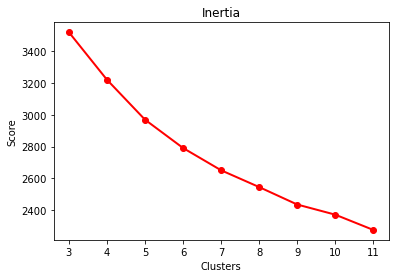

In [101]:
drawElbow( K_LIST, I_LIST, "Inertia" )        # K_List of each cluster #, I_list is score
# more clusters you have it'll always go lower ; looking for elbow (that's usually the limit)

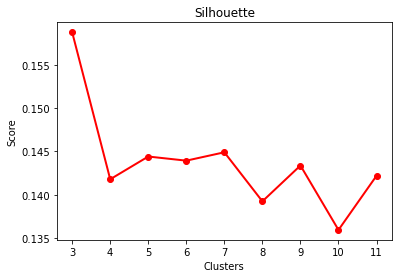

In [102]:
drawElbow( K_LIST, S_LIST, "Silhouette" )
# want # to be as high as possible ; maybe more around 4  ; starts bouncing up probably ignore

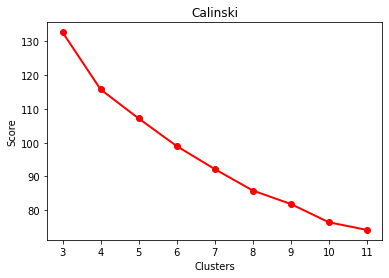

In [103]:
drawElbow( K_LIST, C_LIST, "Calinski" )

In [105]:
clusterData( four_factors[cols], X_TRN, 4, TARGET )
print(g)





K =  4
   EFG_PCT_RANK  TM_TOV_PCT_RANK  OREB_PCT_RANK  FTA_RATE_RANK  \
0            18               25             22             13   
1            15                5             29             14   
2            20               10              9              6   
3            26               24             21             11   
4            11               16             15             12   

   OPP_EFG_PCT_RANK  OPP_TOV_PCT_RANK  OPP_OREB_PCT_RANK  OPP_TOV_PCT_RANK  \
0                28                11                  9                11   
1                 6                 2                  5                 2   
2                 7                18                  8                18   
3                29                15                 12                15   
4                27                26                  7                26   

   W_PCT  CLUSTER  
0  0.402        0  
1  0.598        2  
2  0.537        1  
3  0.256        0  
4  0.354        1  
   

In [55]:
print(g)

[]


In [84]:
#a = clusterData( df, X_TRN, 5, TARGET )
g = pd.DataFrame(g)
g.to_csv('cluster1.csv')

<AxesSubplot:xlabel='season', ylabel='W_PCT'>

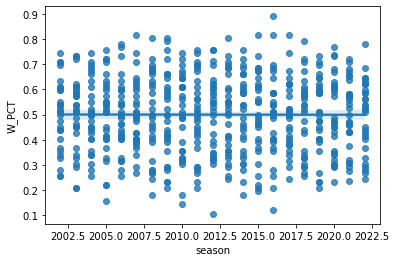

In [26]:
sns.regplot(x = four_factors['season'], y = four_factors['W_PCT'])

In [86]:
print(four_factors.columns)

Index(['TEAM_ID', 'TEAM_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'EFG_PCT',
       'FTA_RATE', 'TM_TOV_PCT', 'OREB_PCT', 'OPP_EFG_PCT', 'OPP_FTA_RATE',
       'OPP_TOV_PCT', 'OPP_OREB_PCT', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'EFG_PCT_RANK', 'FTA_RATE_RANK',
       'TM_TOV_PCT_RANK', 'OREB_PCT_RANK', 'OPP_EFG_PCT_RANK',
       'OPP_FTA_RATE_RANK', 'OPP_TOV_PCT_RANK', 'OPP_OREB_PCT_RANK', 'CFID',
       'CFPARAMS', 'season', 'FG', 'TO', 'TR', 'FT'],
      dtype='object')


In [94]:
proj_wins = []

for i, row in four_factors.iterrows():
    result = 41.06 + (351.88 * row['FG']) + (333.06 * row['TO']) + (130.61 * row['TR']) + (44.43 * row['FT'])
    total_wins = row['GP'] * (result/82)
    proj_wins.append(round(total_wins,2))

four_factors['proj_wins'] = proj_wins
four_factors.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,...,CFID,CFPARAMS,season,FG,TO,TR,FT,proj_wins,win_delta,abs_win_delta
0,1610612737,Atlanta Hawks,82,33,49,0.402,3956.0,0.471,0.294,0.166,...,10,Atlanta Hawks,2002,-0.024,-0.005,-0.014,0.001,29.17,3.83,3.83
1,1610612738,Boston Celtics,82,49,33,0.598,3966.0,0.476,0.291,0.144,...,10,Boston Celtics,2002,0.012,0.029,-0.033,-0.027,49.43,-0.43,0.43
2,1610612766,Charlotte Hornets,82,44,38,0.537,3951.0,0.466,0.320,0.154,...,10,Charlotte Hornets,2002,0.001,-0.002,0.022,0.026,44.77,-0.77,0.77
3,1610612741,Chicago Bulls,82,21,61,0.256,3961.0,0.456,0.302,0.166,...,10,Chicago Bulls,2002,-0.041,-0.010,-0.017,-0.019,20.24,0.76,0.76
4,1610612739,Cleveland Cavaliers,82,29,53,0.354,3971.0,0.477,0.301,0.158,...,10,Cleveland Cavaliers,2002,-0.016,-0.017,0.009,-0.001,30.90,-1.90,1.90


In [95]:
# how far off proj wins
four_factors['win_delta'] = four_factors['W'] - four_factors['proj_wins']
four_factors['abs_win_delta'] = abs(four_factors['W'] - four_factors['proj_wins'])

In [96]:
print(four_factors.sort_values(by = 'abs_win_delta', ascending = False).head(100))

       TEAM_ID           TEAM_NAME  GP   W   L  W_PCT     MIN  EFG_PCT  \
2   1610612766   Charlotte Bobcats  82  18  64  0.220  3976.0    0.455   
22  1610612755  Philadelphia 76ers  82  10  72  0.122  3961.0    0.487   
6   1610612742    Dallas Mavericks  82  24  58  0.293  3961.0    0.513   
22  1610612755  Philadelphia 76ers  66  35  31  0.530  3183.0    0.480   
3   1610612766   Charlotte Hornets  82  36  46  0.439  3956.0    0.508   
..         ...                 ...  ..  ..  ..    ...     ...      ...   
22  1610612755  Philadelphia 76ers  82  27  55  0.329  3961.0    0.496   
1   1610612738      Boston Celtics  82  51  31  0.622  3981.0    0.542   
5   1610612742    Dallas Mavericks  82  57  25  0.695  3941.0    0.525   
21  1610612756        Phoenix Suns  82  29  53  0.354  3946.0    0.475   
4   1610612741       Chicago Bulls  65  22  43  0.338  3135.0    0.515   

    FTA_RATE  TM_TOV_PCT  ...  CFID            CFPARAMS  season     FG     TO  \
2      0.306       0.154  ... 

In [97]:
four_factors.to_csv('cluster1.csv')

In [106]:
print(four_factors[four_factors['TEAM_NAME'] == 'Oklahoma City Thunder'].head())

       TEAM_ID              TEAM_NAME  GP   W   L  W_PCT     MIN  EFG_PCT  \
20  1610612760  Oklahoma City Thunder  82  23  59  0.280  3961.0    0.471   
20  1610612760  Oklahoma City Thunder  82  50  32  0.610  3961.0    0.494   
20  1610612760  Oklahoma City Thunder  82  55  27  0.671  4001.0    0.501   
20  1610612760  Oklahoma City Thunder  66  47  19  0.712  3198.0    0.516   
20  1610612760  Oklahoma City Thunder  82  60  22  0.732  3966.0    0.527   

    FTA_RATE  TM_TOV_PCT  ...               CFPARAMS  season     FG     TO  \
20     0.308       0.170  ...  Oklahoma City Thunder    2009 -0.043 -0.025   
20     0.333       0.158  ...  Oklahoma City Thunder    2010  0.011  0.001   
20     0.363       0.148  ...  Oklahoma City Thunder    2011  0.008 -0.001   
20     0.334       0.172  ...  Oklahoma City Thunder    2012  0.051 -0.022   
20     0.338       0.160  ...  Oklahoma City Thunder    2013  0.058 -0.005   

       TR     FT  proj_wins  win_delta  abs_win_delta  CLUSTER  
20 